In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn.metrics import mean_squared_error

In [4]:
from mpl_toolkits import mplot3d

In [5]:
adv = pd.read_csv('data/Advertising.csv')
adv.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


# Different LR mode

## Least squares polynomial fit

In [6]:
least_square = np.polyfit(adv.TV,adv.Sales,deg=1)

In [7]:
least_square

array([0.04753664, 7.03259355])

In [8]:
y_pred = least_square[1] + least_square[0]* adv.TV

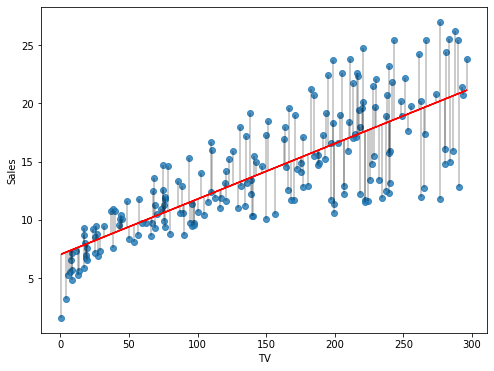

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot('TV', 'Sales', data=adv,fit_reg=False)
plt.plot(adv.TV,y_pred,color='red')
plt.vlines(adv['TV'], y_pred, adv['Sales'], lw = .4);

In [10]:
mean_squared_error(adv.Sales, y_pred)

10.512652915656753

## 3d plotting

In [3]:
_x = np.linspace(0, 2, 3)
_y = np.linspace(1, 3, 3)
xv, yv = np.meshgrid(_x, _y)
xv

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [4]:
yv

array([[1., 1., 1.],
       [2., 2., 2.],
       [3., 3., 3.]])

In [11]:

def mse_func(w0,w1,ds=adv,x='TV',y='Sales'):
    return np.mean((ds[y] - w0 - w1*ds[x])**2)
    

In [12]:
w0 = np.linspace(5,9,100)
w1 = np.linspace(0.03,0.07,100)
mse_f = np.array([mse_func(i,j) for i in w0 for j in w1])

In [13]:
w0,w1 = np.meshgrid(w0,w1)
mse_f = mse_f.reshape(w0.shape)

In [14]:
w0.shape,w1.shape,mse_f.shape # turn into 2D map for easy 3d plotting

((100, 100), (100, 100), (100, 100))

In [15]:
min_mse = mse_func(least_square[1],least_square[0])
min_mse

10.512652915656759

In [16]:
mse_f.min()

10.512864017691566

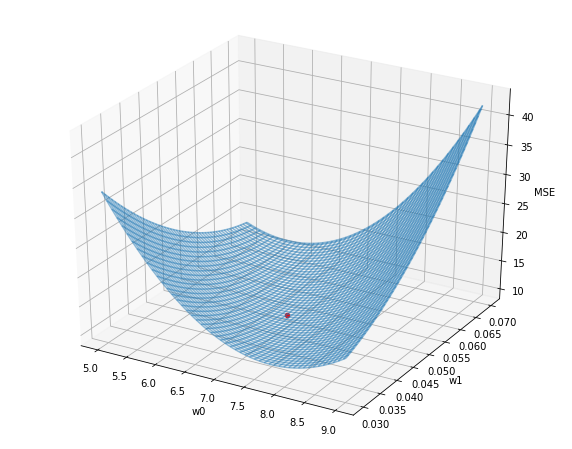

In [17]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.plot_wireframe(w0, w1, mse_f,alpha=.5)
ax.scatter3D(least_square[1],least_square[0], min_mse, c='r')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('MSE');

## Statistical analysis: statsmodels

In [18]:
import statsmodels.formula.api as smf

In [19]:
results = smf.ols('Sales ~ Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           4.35e-19
Time:                        19:24:13   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
Radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results = smf.ols('Sales ~ Newspaper', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 23 Nov 2019   Prob (F-statistic):            0.00115
Time:                        19:24:13   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
results = smf.ols('Sales ~ TV + Newspaper + Radio', data=adv).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 23 Nov 2019   Prob (F-statistic):           1.58e-96
Time:                        19:24:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Individually, Newspaper have p 0.001, so statistically significant toward predicting sales. But for multiple regression, p goes to 0.86

# Check outliers

In [22]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [23]:
results_influence = OLSInfluence(results)

In [24]:
results.fittedvalues

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

Text(0, 0.5, 'Studentized Residuals')

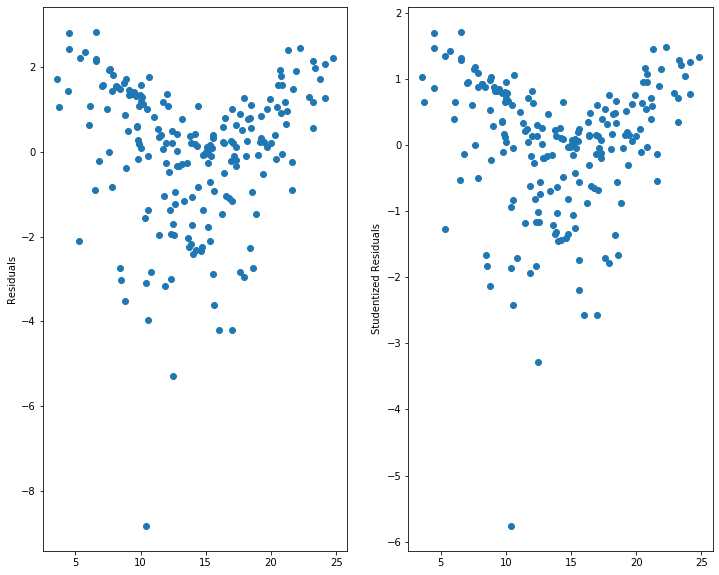

In [25]:
fig,axes = plt.subplots(1,2,figsize=(12,10))
axes[0].scatter(results.fittedvalues,results.resid)
axes[0].set_ylabel('Residuals')
axes[1].scatter(results.fittedvalues, 
                results_influence.resid_studentized_external)
axes[1].set_ylabel('Studentized Residuals')

About 2 outliers (using regression)

# Check for high leverage point

In [26]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

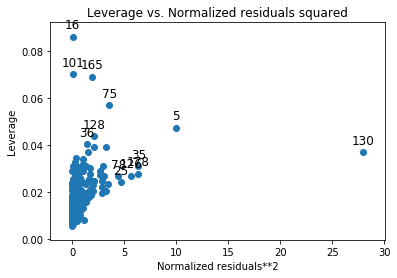

In [27]:
# fig, ax = plt.subplots()
plot_leverage_resid2(results);

Observation 16 might have high coverage

# Correlation matrix

In [28]:
adv.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


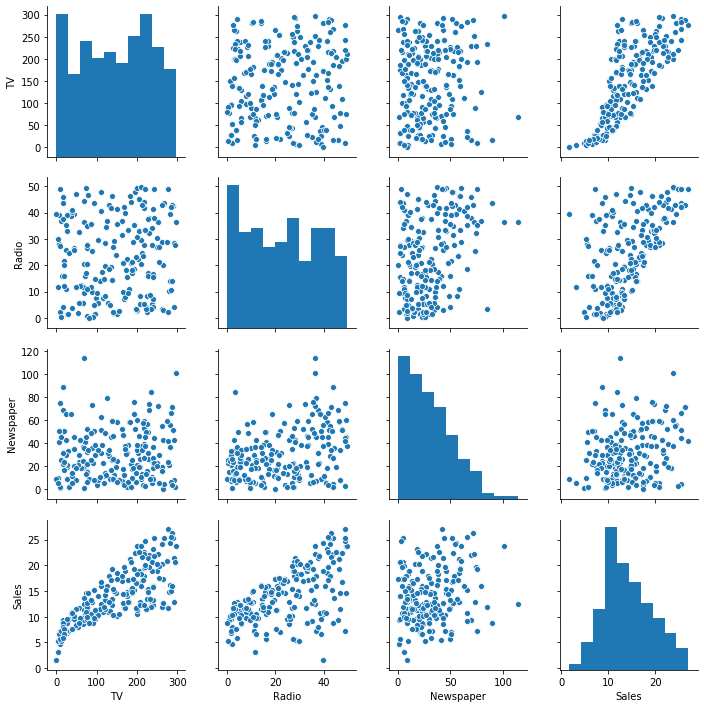

In [29]:
sns.pairplot(adv)

# collinearity check with VIF

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

adv_const = add_constant(adv.loc[:,['TV','Radio','Newspaper']])

/home/quantran/anaconda3/envs/fastai_v1/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
adv_const.tail()

,const,TV,Radio,Newspaper
195,1.0,38.2,3.7,13.8
196,1.0,94.2,4.9,8.1
197,1.0,177.0,9.3,6.4
198,1.0,283.6,42.0,66.2
199,1.0,232.1,8.6,8.7


In [32]:
vifs = pd.Series([variance_inflation_factor(adv_const.values, i) 
                  for i in range(adv_const.shape[1])], 
              index=adv_const.columns)

In [33]:
vifs

const        6.848900
TV           1.004611
Radio        1.144952
Newspaper    1.145187
dtype: float64

Low collinearity. Newspaper is still highest.

# Sklearn

In [34]:
# least squares
from sklearn.linear_model import LinearRegression

X = adv.loc[:,['TV','Radio','Newspaper']].copy()
Y = adv.Sales
lr = LinearRegression().fit(X,Y) 

In [35]:
lr.score(X,Y)

0.8972106381789521

In [36]:
lr.intercept_,lr.coef_

(2.9388893694594085, array([ 0.04576465,  0.18853002, -0.00103749]))

In [37]:
results.params

Intercept    2.938889
TV           0.045765
Newspaper   -0.001037
Radio        0.188530
dtype: float64

In [38]:
# sgd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(X)


In [39]:
clf = SGDRegressor(max_iter=500, learning_rate = 'adaptive')
clf.fit(X_scale,Y);
clf.intercept_,clf.coef_

(array([14.01999096]), array([ 3.92126672,  2.78674654, -0.01600778]))

In [40]:
clf.score(X_scale,Y)

0.8972085341393735

# Exercise 14 on Colinearity

In [41]:
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)


In [42]:
df = pd.DataFrame({'x1': x1,'x2': x2, 'y':y})
df.corr()

,x1,x2,y
x1,1.000000,0.977474,0.499060
x2,0.977474,1.000000,0.482917
y,0.499060,0.482917,1.000000


In [301]:
results = smf.ols('y ~ x1 + x2', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     16.13
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           8.95e-07
Time:                        00:05:16   Log-Likelihood:                -144.37
No. Observations:                 100   AIC:                             294.7
Df Residuals:                      97   BIC:                             302.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2250      0.259      8.583      0.000       1.710       2.739
x1             2.4383      1.675      1.456      0.149      -0.886       5.763
x2            -0.8693      3.292     -0.264      0.792      -7.404       5.665
==============================================================================
Omnibus:                        0.285   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.393
Skew:                           0.118   Prob(JB):                        0.822
Kurtosis:                       2.804   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note: notice that because of colinearity, x1 and x2 aren't statistically significant anymore (high p values) 

=> colinearity causes standard error for each feature grow

In [303]:
results = smf.ols('y ~ x1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     32.50
Date:                Sun, 20 Oct 2019   Prob (F-statistic):           1.26e-07
Time:                        00:05:34   Log-Likelihood:                -144.41
No. Observations:                 100   AIC:                             292.8
Df Residuals:                      98   BIC:                             298.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1817      0.200     10.914      0.000       1.785       2.578
x1             2.0060      0.352      5.701      0.000       1.308       2.704
==============================================================================
Omnibus:                        0.282   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.399
Skew:                           0.116   Prob(JB):                        0.819
Kurtosis:                       2.795   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Important note: even though x1 and x2 are highly colinear, remove one does not help. See below**

In [ ]:
# colinearity check

In [304]:
df_const = add_constant(df.loc[:,['x1','x2']])
df_const.tail()

/home/quantran/anaconda3/envs/gen/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,x1,x2
95,1.0,0.237027,0.211711
96,1.0,0.903380,0.453085
97,1.0,0.573679,0.310276
98,1.0,0.002870,0.063113
99,1.0,0.617145,0.403474


In [305]:
vifs = pd.Series([variance_inflation_factor(df_const.values, i) 
                  for i in range(df_const.shape[1])], 
              index=df_const.columns)

vifs

const     6.203423
x1       22.449405
x2       22.449405
dtype: float64

No doubt for colinearity

## SGD

In [306]:
df_X = df.loc[:,['x1','x2']]

In [312]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler().fit_transform(df_X)


clf = SGDRegressor(max_iter=500, learning_rate = 'adaptive')
clf.fit(df_X,df['y']);

In [313]:
clf.intercept_,clf.coef_

(array([2.21557695]), array([1.45947463, 0.81311205]))

In [314]:
clf.score(df_X,df['y'])

0.2463089820965131

Not better. SGD is also susceptible to colinearity

# Random Forest

In [324]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=10, min_samples_split=2,
                             n_estimators=100)

In [325]:
regr.fit(df_X,y);

In [326]:
regr.score(df_X,y) # might be overfit

0.851500085560756

# Why removing colinear feature doesn't help (for this problem)

The np.random.rand at the end of y is possibly the reason why it's so hard to predict this using linear regression

On the other hand, the np.random in x2 will have coefficient of 0.03 in the end, make it small enough to be ignore

Previously...
```python
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2 + np.random.randn(100)

```

In [342]:
from sklearn.metrics import r2_score
np.random.seed(1)
x1 = np.random.rand(100)
x2 = .5 * x1 + np.random.rand(100) / 10
y = 2 + 2 * x1 + .3 * x2  

In [343]:
# this is good enough to achieve near perfect score
y_temp = 2 + 2.15*x1
# the correct reduced form: y = 2+ 2.15*x1 + 0.03 * np.random

r2_score(y,y_temp)

0.9992469010856586

In [344]:
df = pd.DataFrame({'x1': x1,'x2': x2, 'y':y})
df.corr()

results = smf.ols('y ~ x1 + x2', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.072e+31
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        00:34:39   Log-Likelihood:                 3383.2
No. Observations:                 100   AIC:                            -6760.
Df Residuals:                      97   BIC:                            -6753.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000   1.24e-16   1.61e+16      0.000       2.000       2.000
x1             2.0000   8.02e-16    2.5e+15      0.000       2.000       2.000
x2             0.3000   1.58e-15    1.9e+14      0.000       0.300       0.300
==============================================================================
Omnibus:                        1.554   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.460   Jarque-Bera (JB):                1.348
Skew:                          -0.126   Prob(JB):                        0.510
Kurtosis:                       2.490   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This doesn't care about colinearity

In [345]:
results = smf.ols('y ~ x1', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.362e+05
Date:                Sun, 20 Oct 2019   Prob (F-statistic):          1.34e-180
Time:                        00:36:08   Log-Likelihood:                 323.92
No. Observations:                 100   AIC:                            -643.8
Df Residuals:                      98   BIC:                            -638.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0149      0.002   1089.893      0.000       2.011       2.019
x1             2.1492      0.003    660.438      0.000       2.143       2.156
==============================================================================
Omnibus:                       92.818   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.085
Skew:                          -0.030   Prob(JB):                       0.0176
Kurtosis:                       1.608   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nearly correct with coeff 2.15 for x1